## **Time Series Analysis Task Notebook**

This notebook is designed to test you through various Time Series Analysis tasks using the Bike Sharing dataset. The tasks will help you develop essential skills in handling time-based data, including cleaning and preprocessing, feature engineering, and model building. You'll explore techniques such as creating lag and rolling window features, implementing linear regression for time series prediction, and applying XGBoost with hyperparameter tuning. Finally, you'll evaluate and compare the performance of the models, providing insights into their effectiveness. These tasks will enhance your understanding of time series analysis and prepare you for real-world forecasting challenges.

# **About the Dataset**
The Bike Sharing Dataset contains information about bike rental counts in the city of Washington, D.C., recorded at hourly intervals. The dataset provides data on various factors that influence bike rentals, including weather conditions, time of day, and seasonal factors. It includes several features such as temperature, humidity, wind speed, and day of the week, which can be used for building predictive models to forecast bike rental demand.

The dataset spans multiple years and captures the number of bikes rented at each hour of the day, making it ideal for time series analysis. By leveraging this data, you can explore patterns in bike rentals over time, uncover seasonality, and implement models for predicting future rental demand.





## **Key Attributes in the Dataset:**

**instant:** Record index.

**dteday:** Date of the observation.

**season:** The season (1: Spring, 2: Summer, 3: Fall, 4: Winter).

**yr:** Year (0: 2011, 1: 2012).

**mnth:** Month of the year (1 to 12).

**hour:** Hour of the day (0 to 23).

**holiday:** Whether the day is a holiday (1: Yes, 0: No).

**weekday:** Day of the week (0 to 6).

**workingday:** Whether it's a working day (1: Yes, 0: No).

**weathersit:** Weather condition (1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain).

**temp:** Temperature (normalized).

**hum:** Humidity (normalized).

**windspeed:** Wind speed (normalized).

**cnt:** The total number of bike rentals at that hour.

This dataset offers a comprehensive set of features to explore and analyze bike-sharing patterns, making it an excellent resource for time series forecasting tasks.

## **Exercise**

1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) from Kaggle. Use the "hour.csv" file.
2. Visualize the structure of the dataset using appropriate libraries and plots.
3. <font color='green'> Clean and pre-process the dataset as required and prepare the data for modelling.</font>
4. <font color='green'>Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.</font>
5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
6. <font color='green'>Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.</font>
7. Experiment with predicting different time periods, such as use all data to predict bike rentals for just the next day (24 hours) or the next entire month and then see how much better or worse the model gets
8. Experiment tuning hyperparameters

**Bonus task (Optional)**

This tasks is not mandatory, but it is designed for those who want to challenge themselves, enhance their critical thinking skills, or dive deeper into the topic. If you're eager to learn more or test your understanding, this task can provide additional learning opportunities.
1. Modelling: Implement an ARIMA model, evaluate it using relevant plots and provide a summary analysis .
  


<hr>
The hand-in exercise for this topic is Task 3,4 and 6 from the notebook “TSA_Task”. This
means that you have to do the cleaning of dataset, then create features (at least 5 new
features should be created, and you should be able to justify why you created each of
the features). And then, you should train an XGBoost model on the dataset. Note that
you also need to do relevant train, test, validation split and be able to explain why you
chose a certain split. Lastly, you should calculate evaluation metrics: rmse and mae to
show performance of your model. The hyperparameter tuning part is not required.
<hr>

<h3>Task 1 Load the dataset from Kaggle</h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os


path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")
print("Path to dataset files:", path)


Path to dataset files: C:\Users\sebas\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1


In [ ]:
file_path = r"C:\Users\sebas\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1\hour.csv"

df = pd.read_csv(file_path)

<hr>
<h3>Task 2 Visualize the structure of the dataset using appropriate libraries and plots.</h3>

In [55]:
print(f"Total rows / columns :",df.shape,"\n")
print(f"Name of all columns :",df.columns,"\n")
print(f"Data types of all columns :",df.dtypes)


Total rows / columns : (17379, 17) 

Name of all columns : Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object') 

Data types of all columns : instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


An observation here is that dteday is datatype object.

In [70]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%Y-%m-%d')
print(f"Data types of all columns after date fix:",df.dtypes)

Data types of all columns after date fix: instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [45]:
display(df.head(5))
display(df.sample(frac=0.2, random_state=2))
display(df.tail(5))

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5943,5944,2011-09-10,3,0,9,4,0,6,0,1,0.58,0.5455,0.94,0.0896,3,4,7
15739,15740,2012-10-23,4,1,10,0,0,2,1,1,0.46,0.4545,0.88,0.1642,5,32,37
2906,2907,2011-05-06,2,0,5,0,0,5,1,1,0.44,0.4394,0.44,0.1642,13,43,56
12842,12843,2012-06-24,3,1,6,7,0,0,0,1,0.64,0.6061,0.69,0.1045,23,48,71
9053,9054,2012-01-18,1,1,1,3,0,3,1,2,0.44,0.4394,0.51,0.4925,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,7406,2011-11-10,4,0,11,4,0,4,1,1,0.38,0.3939,0.94,0.0896,1,2,3
3990,3991,2011-06-20,2,0,6,4,0,1,1,3,0.62,0.5606,0.88,0.1642,1,2,3
1210,1211,2011-02-23,1,0,2,12,0,3,1,1,0.26,0.2879,0.35,0.0896,11,56,67
3154,3155,2011-05-16,2,0,5,8,0,1,1,1,0.56,0.5303,0.73,0.2985,28,366,394


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [40]:
display(df.describe(include='all'))

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [61]:
print(df.info)

print(f"Any dublicates? :",df.duplicated().sum())

<bound method DataFrame.info of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0

<strong>cnt</strong> is the most interresting column to check coralation with based on other columns, since it's the count of total bike rentals that hour. So the influences like holiday, weekday, windspeed, all are factors that could influence count of total bike's rented. 

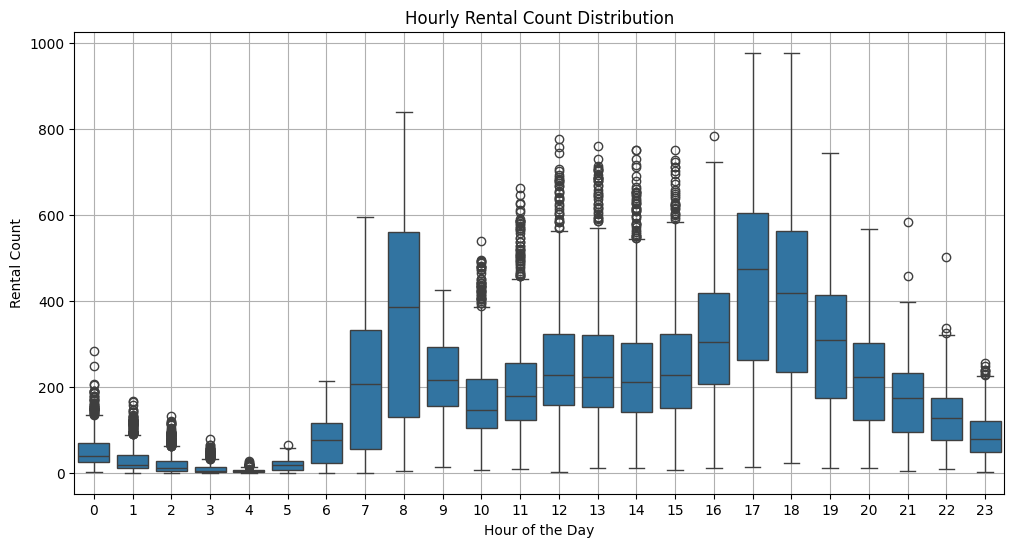

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=df)
plt.title("Hourly Rental Count Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Rental Count")
plt.grid(True)
plt.show()


<p><strong>Boxplot grouped by hour of the day</strong> : This shows what we would expect. Rental count is highest in the morning, daytime and evening, and lowest between 0-5am. Clear morning peak at 8am and evening peak 5pm. Daytime bit lower than rush hours(7-9am and 16-17pm). The rush hours have the wides boxes  but daytime have the most outliers. Could be related to events like workday or weekends</p>

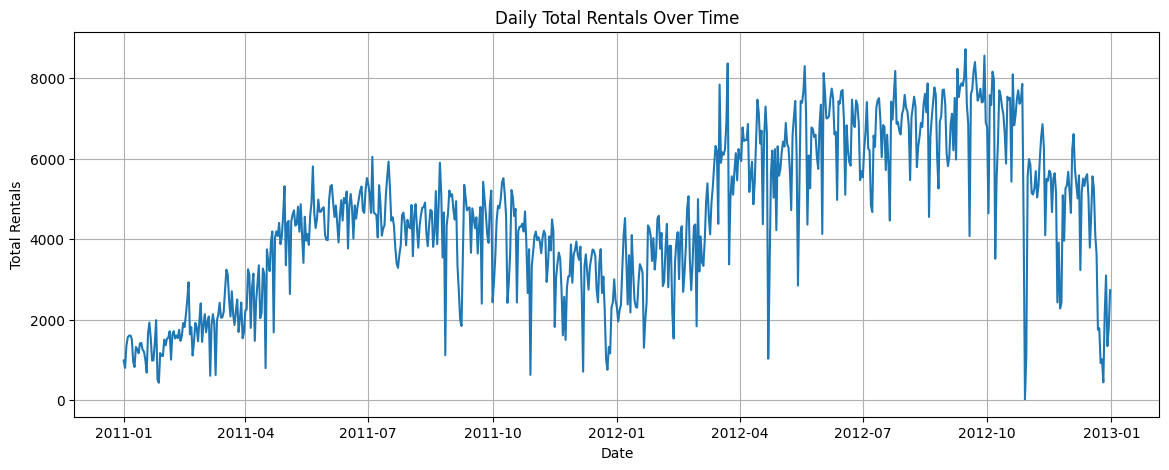

In [78]:
daily_df = df.groupby('dteday')['cnt'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(x='dteday', y='cnt', data=daily_df)
plt.title("Daily Total Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.grid(True)
plt.show()


<strong>Trend over Date</strong> Mostly populer in the summmer months

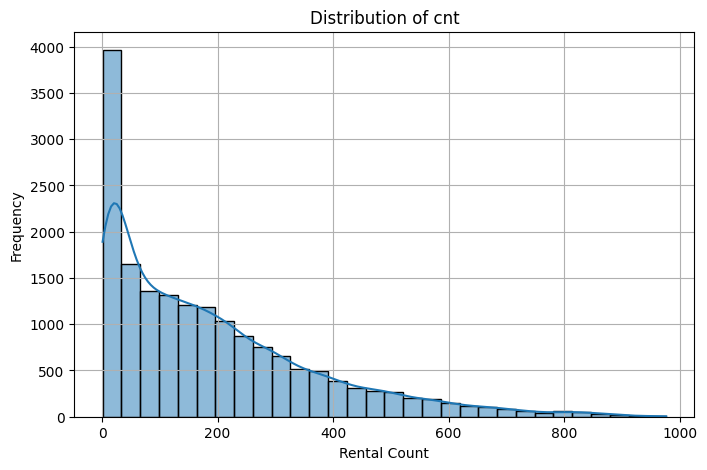

In [75]:
plt.figure(figsize=(8, 5))
sns.histplot(df['cnt'], kde=True, bins=30)
plt.title("Distribution of cnt")
plt.xlabel("Rental Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


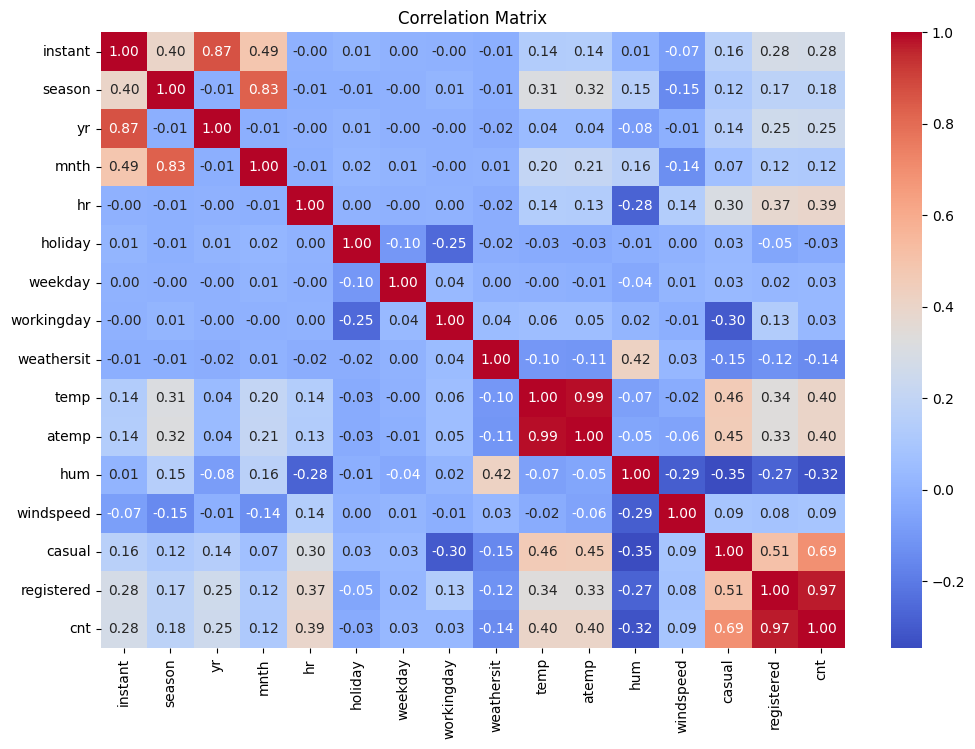

In [76]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


<hr>
<h3>Task 3 Clean and pre-process the dataset as required and prepare the data for modelling.</h3>

We converted date in prevous tasks, but lets repeat for clerence

In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%Y-%m-%d')
print(f"DataType after date conversion:",df.dtypes['dteday'])

DataType after date conversion: datetime64[ns]


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<h4> To confirm we have cleaned and progressed the data I seperate the columns into numerical-columns, categorical-columns and date-column</h4>

In [73]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()
datetime = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print(f"Numerical columns: {numerical}\n")
print(f"Categorical columns: {categorical}\n")
print(f"Date columns: {datetime}\n")

Numerical columns: ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Categorical columns: []

Date columns: ['dteday']



## **Exercise**

1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) from Kaggle. Use the "hour.csv" file.
2. Visualize the structure of the dataset using appropriate libraries and plots.
3. <font color='green'> Clean and pre-process the dataset as required and prepare the data for modelling.</font>
4. <font color='green'>Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.</font>
5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
6. <font color='green'>Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.</font>
7. Experiment with predicting different time periods, such as use all data to predict bike rentals for just the next day (24 hours) or the next entire month and then see how much better or worse the model gets
8. Experiment tuning hyperparameters

**Bonus task (Optional)**

This tasks is not mandatory, but it is designed for those who want to challenge themselves, enhance their critical thinking skills, or dive deeper into the topic. If you're eager to learn more or test your understanding, this task can provide additional learning opportunities.
1. Modelling: Implement an ARIMA model, evaluate it using relevant plots and provide a summary analysis .
  
